In [5]:
import nltk 
import pandas as pd

from nltk.corpus import sentiwordnet as swn

df = pd.read_csv("tweets_clean.csv")

display(df.head())

,Unnamed: 0,Content,Created at,Clean
0,0,Fall semester is a few weeks old. How are clas...,2021-08-29 17:16:11,"['fall', 'semester', 'week', 'old', 'class', '..."
1,1,@SoulProvider08 I would be on twitter even dur...,2021-08-29 17:15:13,"['would', 'twitter', 'even', 'online', 'class'..."
2,2,Need help!!!\n\n#pay someone\nPhysics\n#essayh...,2021-08-29 17:15:13,"['need', 'help', 'pay', 'someone', 'physic', '..."
3,3,Do you need help with your online classes\n..d...,2021-08-29 17:14:51,"['need', 'help', 'online', 'class']"
4,4,SCERT\nINSET: Relationship Building Program\nS...,2021-08-29 17:14:48,"['scert', 'inset', 'relationship', 'building',..."


In [6]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

display(df.head())

,Content,Created at,Clean
0,Fall semester is a few weeks old. How are clas...,2021-08-29 17:16:11,"['fall', 'semester', 'week', 'old', 'class', '..."
1,@SoulProvider08 I would be on twitter even dur...,2021-08-29 17:15:13,"['would', 'twitter', 'even', 'online', 'class'..."
2,Need help!!!\n\n#pay someone\nPhysics\n#essayh...,2021-08-29 17:15:13,"['need', 'help', 'pay', 'someone', 'physic', '..."
3,Do you need help with your online classes\n..d...,2021-08-29 17:14:51,"['need', 'help', 'online', 'class']"
4,SCERT\nINSET: Relationship Building Program\nS...,2021-08-29 17:14:48,"['scert', 'inset', 'relationship', 'building',..."


In [7]:
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

pd.set_option('display.max_colwidth', None)

df["Pos"] = df["Clean"].astype(str).str.replace('\[|\]|\'|\,', '')

pos = []

for words in df["Pos"]:
    list = word_tokenize(words)
    pos.append(nltk.pos_tag(list))

    
df["Pos"] = pos    

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laura/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-7-39371acbd954>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Pos"] = df["Clean"].astype(str).str.replace('\[|\]|\'|\,', '')


In [8]:
display(df.head())

,Content,Created at,Clean,Pos
0,"Fall semester is a few weeks old. How are classes taking you so far?\n\nIf you ever need help with Assignments, Essays, Research papers or online classes, we got your back!!!\nDm/Text :7205748182\nWhatsApp : +1 (936) 349-9481\n\nAffordable rates💯\nGrade A guaranteed 💯",2021-08-29 17:16:11,"['fall', 'semester', 'week', 'old', 'class', 'taking', 'far', 'ever', 'need', 'help', 'assignment', 'essay', 'research', 'paper', 'online', 'class', 'got', 'back', 'text', 'whatsapp', 'affordable', 'rate', 'grade', 'guaranteed']","[(fall, NN), (semester, NN), (week, NN), (old, JJ), (class, NN), (taking, NN), (far, RB), (ever, RB), (need, VB), (help, NN), (assignment, VB), (essay, JJ), (research, NN), (paper, NN), (online, JJ), (class, NN), (got, VBD), (back, RB), (text, JJ), (whatsapp, NN), (affordable, JJ), (rate, NN), (grade, NNS), (guaranteed, VBD)]"
1,@SoulProvider08 I would be on twitter even during online classes tho 😭😭,2021-08-29 17:15:13,"['would', 'twitter', 'even', 'online', 'class', 'tho']","[(would, MD), (twitter, VB), (even, RB), (online, JJ), (class, NN), (tho, NN)]"
2,Need help!!!\n\n#pay someone\nPhysics\n#essayhelp\nEnglish\n#essaypay\nMaths\n#Essaydue\nChem\n#assignments \n\n#assignment due\nEconomics\n#Online classes\nAlgebra\n#Hw due \nPsychology\n#onlineclasses\nAccounting\nResearch\n#javascript \n#CoDMobile \n#CoD,2021-08-29 17:15:13,"['need', 'help', 'pay', 'someone', 'physic', 'essayhelp', 'english', 'essaypay', 'math', 'essaydue', 'chem', 'assignment', 'assignment', 'due', 'economics', 'online', 'class', 'algebra', 'due', 'psychology', 'onlineclasses', 'accounting', 'research', 'javascript', 'codmobile', 'cod']","[(need, NN), (help, NN), (pay, VB), (someone, NN), (physic, JJ), (essayhelp, NN), (english, JJ), (essaypay, NN), (math, NN), (essaydue, JJ), (chem, NN), (assignment, NN), (assignment, NN), (due, JJ), (economics, NNS), (online, JJ), (class, NN), (algebra, NN), (due, JJ), (psychology, NN), (onlineclasses, VBZ), (accounting, VBG), (research, NN), (javascript, NN), (codmobile, NN), (cod, NN)]"
3,Do you need help with your online classes\n..dm us,2021-08-29 17:14:51,"['need', 'help', 'online', 'class']","[(need, NN), (help, VBP), (online, VB), (class, NN)]"
4,SCERT\nINSET: Relationship Building Program\nStrategies\n4 Getting to know each other\n5 Sharing Feedback\n6 Check- in and Check - out\nTeachers were engaged to know the strategies and were ready to implement in Online Classes.\n@uditprakash\n@PbpandeyB\n@ScertDelhi https://t.co/OesRxJoy6C,2021-08-29 17:14:48,"['scert', 'inset', 'relationship', 'building', 'program', 'strategy', 'getting', 'know', 'sharing', 'feedback', 'check', 'check', 'teacher', 'engaged', 'know', 'strategy', 'ready', 'implement', 'online', 'class']","[(scert, JJ), (inset, NN), (relationship, NN), (building, VBG), (program, NN), (strategy, NN), (getting, VBG), (know, JJ), (sharing, VBG), (feedback, NN), (check, NN), (check, NN), (teacher, RB), (engaged, VBD), (know, JJ), (strategy, NN), (ready, JJ), (implement, JJ), (online, NN), (class, NN)]"


In [9]:
from nltk.corpus import wordnet as wn

#convert the tags to wordnet equivalent
def pos_to_wordnet(tag):
    if tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('R'):
        return wn.ADV
    return ''

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def calculate_sentiment(word,tag):
    wordnet_tag = pos_to_wordnet(tag)
    
    if wordnet_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wordnet_tag)
    if not lemma:
        return []

    synsets = wn.synsets(word, pos=wordnet_tag)
    if not synsets:
        return []

    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

In [11]:
senti_score = []

pos=neg=obj=count=0

for pos_val in df["Pos"]:
    senti_val = [calculate_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df["Polarity"] = senti_score

display(df.head())

,Content,Created at,Clean,Pos,Polarity
0,"Fall semester is a few weeks old. How are classes taking you so far?\n\nIf you ever need help with Assignments, Essays, Research papers or online classes, we got your back!!!\nDm/Text :7205748182\nWhatsApp : +1 (936) 349-9481\n\nAffordable rates💯\nGrade A guaranteed 💯",2021-08-29 17:16:11,"['fall', 'semester', 'week', 'old', 'class', 'taking', 'far', 'ever', 'need', 'help', 'assignment', 'essay', 'research', 'paper', 'online', 'class', 'got', 'back', 'text', 'whatsapp', 'affordable', 'rate', 'grade', 'guaranteed']","[(fall, NN), (semester, NN), (week, NN), (old, JJ), (class, NN), (taking, NN), (far, RB), (ever, RB), (need, VB), (help, NN), (assignment, VB), (essay, JJ), (research, NN), (paper, NN), (online, JJ), (class, NN), (got, VBD), (back, RB), (text, JJ), (whatsapp, NN), (affordable, JJ), (rate, NN), (grade, NNS), (guaranteed, VBD)]",0.875
1,@SoulProvider08 I would be on twitter even during online classes tho 😭😭,2021-08-29 17:15:13,"['would', 'twitter', 'even', 'online', 'class', 'tho']","[(would, MD), (twitter, VB), (even, RB), (online, JJ), (class, NN), (tho, NN)]",0.125
2,Need help!!!\n\n#pay someone\nPhysics\n#essayhelp\nEnglish\n#essaypay\nMaths\n#Essaydue\nChem\n#assignments \n\n#assignment due\nEconomics\n#Online classes\nAlgebra\n#Hw due \nPsychology\n#onlineclasses\nAccounting\nResearch\n#javascript \n#CoDMobile \n#CoD,2021-08-29 17:15:13,"['need', 'help', 'pay', 'someone', 'physic', 'essayhelp', 'english', 'essaypay', 'math', 'essaydue', 'chem', 'assignment', 'assignment', 'due', 'economics', 'online', 'class', 'algebra', 'due', 'psychology', 'onlineclasses', 'accounting', 'research', 'javascript', 'codmobile', 'cod']","[(need, NN), (help, NN), (pay, VB), (someone, NN), (physic, JJ), (essayhelp, NN), (english, JJ), (essaypay, NN), (math, NN), (essaydue, JJ), (chem, NN), (assignment, NN), (assignment, NN), (due, JJ), (economics, NNS), (online, JJ), (class, NN), (algebra, NN), (due, JJ), (psychology, NN), (onlineclasses, VBZ), (accounting, VBG), (research, NN), (javascript, NN), (codmobile, NN), (cod, NN)]",0.375
3,Do you need help with your online classes\n..dm us,2021-08-29 17:14:51,"['need', 'help', 'online', 'class']","[(need, NN), (help, VBP), (online, VB), (class, NN)]",0.000
4,SCERT\nINSET: Relationship Building Program\nStrategies\n4 Getting to know each other\n5 Sharing Feedback\n6 Check- in and Check - out\nTeachers were engaged to know the strategies and were ready to implement in Online Classes.\n@uditprakash\n@PbpandeyB\n@ScertDelhi https://t.co/OesRxJoy6C,2021-08-29 17:14:48,"['scert', 'inset', 'relationship', 'building', 'program', 'strategy', 'getting', 'know', 'sharing', 'feedback', 'check', 'check', 'teacher', 'engaged', 'know', 'strategy', 'ready', 'implement', 'online', 'class']","[(scert, JJ), (inset, NN), (relationship, NN), (building, VBG), (program, NN), (strategy, NN), (getting, VBG), (know, JJ), (sharing, VBG), (feedback, NN), (check, NN), (check, NN), (teacher, RB), (engaged, VBD), (know, JJ), (strategy, NN), (ready, JJ), (implement, JJ), (online, NN), (class, NN)]",0.250


In [12]:
display(df.tail())

,Content,Created at,Clean,Pos,Polarity
29500,"Take a look at what's inside the Shapegrams 03: Ice Cream Cone. 👀 (It's one of the free #Shapegrams!)\n\nThe only thing a teacher has to do is give students the ""Make a copy"" link. \n\nhttps://t.co/789MOXo4Si\n\n#GoogleClassroom #googleedu #blendedlearning #edtech #remotelearning https://t.co/w7B5KIBFgS",21/08/2021 12:10,"['take', 'look', 'inside', 'shapegrams', 'ice', 'cream', 'cone', 'one', 'free', 'shapegrams', 'thing', 'teacher', 'give', 'student', 'make', 'copy', 'link', 'googleclassroom', 'googleedu', 'blendedlearning', 'edtech', 'remotelearning']","[(take, VB), (look, NN), (inside, IN), (shapegrams, JJ), (ice, NN), (cream, NN), (cone, NN), (one, CD), (free, JJ), (shapegrams, NNS), (thing, NN), (teacher, RB), (give, JJ), (student, NN), (make, VBP), (copy, NN), (link, NN), (googleclassroom, NN), (googleedu, NN), (blendedlearning, VBG), (edtech, NN), (remotelearning, NN)]",0.625
29501,A quick overview of how the blended learning works at here at TLI #foundationdegrees #blendedlearning\nhttps://t.co/kJBKew0OIT,21/08/2021 11:43,"['quick', 'overview', 'blended', 'learning', 'work', 'tli', 'foundationdegrees', 'blendedlearning']","[(quick, JJ), (overview, NN), (blended, VBD), (learning, JJ), (work, NN), (tli, NN), (foundationdegrees, NNS), (blendedlearning, VBG)]",0.000
29502,Level 3 First Aid at Work Requalification (Blended Learning).\nThe next available date for the practical face-to-face module is Monday 13 September in Leyland.\nFind out more about the course and book your place here:\nhttps://t.co/yIzpvoSq7S\n#blendedlearning #firstaid https://t.co/FSNRdK2Mya,21/08/2021 11:15,"['level', 'first', 'aid', 'work', 'requalification', 'blended', 'learning', 'next', 'available', 'date', 'practical', 'face', 'face', 'module', 'monday', 'september', 'leyland', 'find', 'course', 'book', 'place', 'blendedlearning', 'firstaid']","[(level, NN), (first, RB), (aid, JJ), (work, NN), (requalification, NN), (blended, VBD), (learning, VBG), (next, JJ), (available, JJ), (date, NN), (practical, JJ), (face, NN), (face, NN), (module, NN), (monday, JJ), (september, NNP), (leyland, NN), (find, VB), (course, NN), (book, NN), (place, NN), (blendedlearning, NN), (firstaid, NN)]",0.500
29503,Algebra 1 5-3 Slope-Intercept Form: Problem 5 - Graphing a Linear Equation. Copy my #goformative lesson at https://t.co/59MiamiwOQ. Copy entire courses at https://t.co/4D2O6TQfgy. @goformative #iteachmath https://t.co/LYwhQG8IKw #shareEDU #blendedlearning https://t.co/D4TFcEDH1v,21/08/2021 10:16,"['algebra', 'slope', 'intercept', 'form', 'problem', 'graphing', 'linear', 'equation', 'copy', 'goformative', 'lesson', 'copy', 'entire', 'course', 'iteachmath', 'shareedu', 'blendedlearning']","[(algebra, IN), (slope, NN), (intercept, VBP), (form, NN), (problem, NN), (graphing, VBG), (linear, JJ), (equation, NN), (copy, NN), (goformative, JJ), (lesson, NN), (copy, NN), (entire, JJ), (course, NN), (iteachmath, NN), (shareedu, NN), (blendedlearning, NN)]",-0.625
29504,"Persona Life Skills helps build your students' social &amp; emotional #wellbeing. Help your #pupils navigate their life journey. Web-based #elearning, sign up, start using. #education #lifeskills #SEL #PSHE #blendedlearning #edtech \n\nMore 👉 https://t.co/cm2qLI5C4u https://t.co/TqzAysf1Em",21/08/2021 09:45,"['persona', 'life', 'skill', 'help', 'build', 'student', 'social', 'amp', 'emotional', 'wellbeing', 'help', 'pupil', 'navigate', 'life', 'journey', 'web', 'based', 'elearning', 'sign', 'start', 'using', 'education', 'lifeskills', 'sel', 'pshe', 'blendedlearning', 'edtech']","[(persona, JJ), (life, NN), (skill, NN), (help, VBP), (build, VB), (student, JJ), (social, JJ), (amp, JJ), (emotional, JJ), (wellbeing, NN), (help, NN), (pupil, VB), (navigate, JJ), (life, NN), (journey, NN), (web, NN), (based, VBN), (elearning, VBG), (sign, JJ), (start, NN), (using, VBG), (education, NN), (lifeskills, NNS), (sel, VBP), (pshe, JJ), (blendedlearning, NN), (edtech, NN)]

In [13]:
score=[]

for i in range(len(df)):
    if df["Polarity"][i]>= 0.05:
        score.append('Positive')
    elif df["Polarity"][i]<= -0.05:
        score.append('Negative')
    else:
        score.append('Neutral')
df["Sentiment"] = score

In [14]:
display(df.head())

,Content,Created at,Clean,Pos,Polarity,Sentiment
0,"Fall semester is a few weeks old. How are classes taking you so far?\n\nIf you ever need help with Assignments, Essays, Research papers or online classes, we got your back!!!\nDm/Text :7205748182\nWhatsApp : +1 (936) 349-9481\n\nAffordable rates💯\nGrade A guaranteed 💯",2021-08-29 17:16:11,"['fall', 'semester', 'week', 'old', 'class', 'taking', 'far', 'ever', 'need', 'help', 'assignment', 'essay', 'research', 'paper', 'online', 'class', 'got', 'back', 'text', 'whatsapp', 'affordable', 'rate', 'grade', 'guaranteed']","[(fall, NN), (semester, NN), (week, NN), (old, JJ), (class, NN), (taking, NN), (far, RB), (ever, RB), (need, VB), (help, NN), (assignment, VB), (essay, JJ), (research, NN), (paper, NN), (online, JJ), (class, NN), (got, VBD), (back, RB), (text, JJ), (whatsapp, NN), (affordable, JJ), (rate, NN), (grade, NNS), (guaranteed, VBD)]",0.875,Positive
1,@SoulProvider08 I would be on twitter even during online classes tho 😭😭,2021-08-29 17:15:13,"['would', 'twitter', 'even', 'online', 'class', 'tho']","[(would, MD), (twitter, VB), (even, RB), (online, JJ), (class, NN), (tho, NN)]",0.125,Positive
2,Need help!!!\n\n#pay someone\nPhysics\n#essayhelp\nEnglish\n#essaypay\nMaths\n#Essaydue\nChem\n#assignments \n\n#assignment due\nEconomics\n#Online classes\nAlgebra\n#Hw due \nPsychology\n#onlineclasses\nAccounting\nResearch\n#javascript \n#CoDMobile \n#CoD,2021-08-29 17:15:13,"['need', 'help', 'pay', 'someone', 'physic', 'essayhelp', 'english', 'essaypay', 'math', 'essaydue', 'chem', 'assignment', 'assignment', 'due', 'economics', 'online', 'class', 'algebra', 'due', 'psychology', 'onlineclasses', 'accounting', 'research', 'javascript', 'codmobile', 'cod']","[(need, NN), (help, NN), (pay, VB), (someone, NN), (physic, JJ), (essayhelp, NN), (english, JJ), (essaypay, NN), (math, NN), (essaydue, JJ), (chem, NN), (assignment, NN), (assignment, NN), (due, JJ), (economics, NNS), (online, JJ), (class, NN), (algebra, NN), (due, JJ), (psychology, NN), (onlineclasses, VBZ), (accounting, VBG), (research, NN), (javascript, NN), (codmobile, NN), (cod, NN)]",0.375,Positive
3,Do you need help with your online classes\n..dm us,2021-08-29 17:14:51,"['need', 'help', 'online', 'class']","[(need, NN), (help, VBP), (online, VB), (class, NN)]",0.000,Neutral
4,SCERT\nINSET: Relationship Building Program\nStrategies\n4 Getting to know each other\n5 Sharing Feedback\n6 Check- in and Check - out\nTeachers were engaged to know the strategies and were ready to implement in Online Classes.\n@uditprakash\n@PbpandeyB\n@ScertDelhi https://t.co/OesRxJoy6C,2021-08-29 17:14:48,"['scert', 'inset', 'relationship', 'building', 'program', 'strategy', 'getting', 'know', 'sharing', 'feedback', 'check', 'check', 'teacher', 'engaged', 'know', 'strategy', 'ready', 'implement', 'online', 'class']","[(scert, JJ), (inset, NN), (relationship, NN), (building, VBG), (program, NN), (strategy, NN), (getting, VBG), (know, JJ), (sharing, VBG), (feedback, NN), (check, NN), (check, NN), (teacher, RB), (engaged, VBD), (know, JJ), (strategy, NN), (ready, JJ), (implement, JJ), (online, NN), (class, NN)]",0.250,Positive


In [15]:
df.to_csv("sentiment.csv")

In [16]:
count = df['Sentiment'].value_counts()
count

Positive    20237
Negative     4778
Neutral      4490
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff5f2587670>,
 [Text(-0.6340424344351673, 0.9594218005317198, 'Positive'),
  Text(0.12154727893799076, -1.1435585944684996, 'Negative'),
  Text(1.021061918990333, -0.5290865312855535, 'Neutral')],
 [Text(-0.35837181076770314, 0.542281887257059, '68.6%'),
  Text(0.06870063592147303, -0.6463592055691518, '16.2%'),
  Text(0.5771219542119272, -0.29904890898748665, '15.2%')])

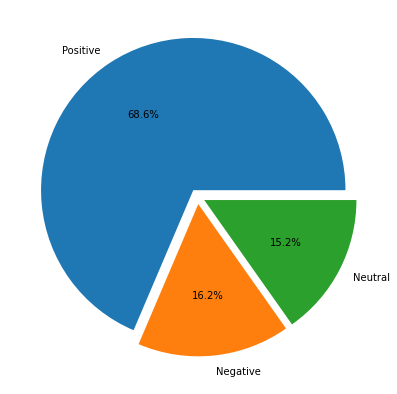

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.pie(count.values, labels = count.index, explode = (0.05, 0.05, 0.05), autopct='%1.1f%%', shadow=False)

In [26]:
df['Clean'] = df['Clean'].str.replace("[']", "")

<ipython-input-26-8baca82b6804>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean'] = df['Clean'].str.replace("[']", "")


In [27]:
display(df['Clean'])


0                                                            [fall, semester, week, old, class, taking, far, ever, need, help, assignment, essay, research, paper, online, class, got, back, text, whatsapp, affordable, rate, grade, guaranteed]
1                                                                                                                                                                                                      [would, twitter, even, online, class, tho]
2        [need, help, pay, someone, physic, essayhelp, english, essaypay, math, essaydue, chem, assignment, assignment, due, economics, online, class, algebra, due, psychology, onlineclasses, accounting, research, javascript, codmobile, cod]
3                                                                                                                                                                                                                     [need, help, online, class]
4                               

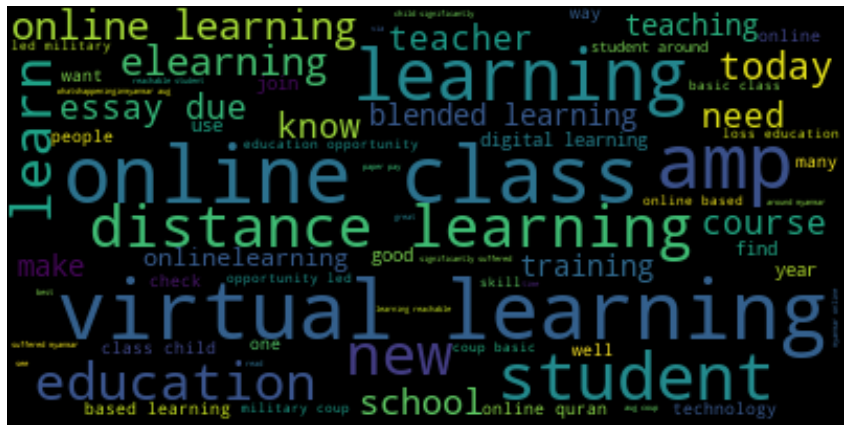

In [29]:
from wordcloud import WordCloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(df.loc[df['Sentiment'] == 'Positive', 'Clean']))

fig=plt.figure(figsize=(15, 8))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()

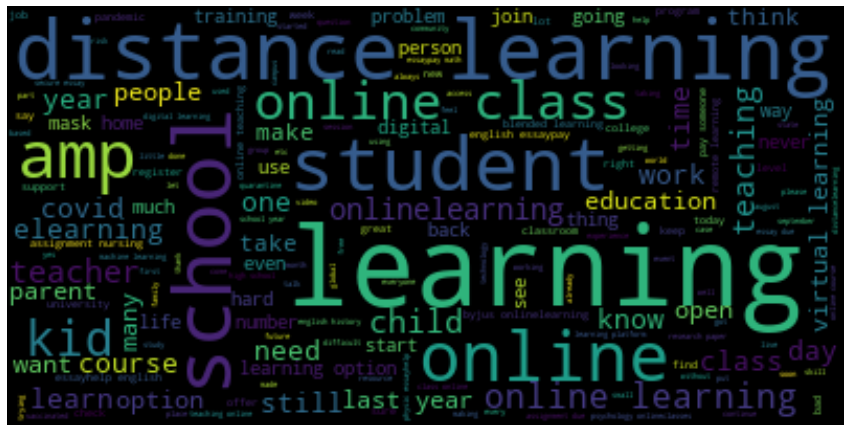

In [30]:
wc = WordCloud()
img = wc.generate_from_text(' '.join(df.loc[df['Sentiment'] == 'Negative', 'Clean']))

fig=plt.figure(figsize=(15, 8))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()